![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Project NLP | Automated Customers Reviews

## Executive Summary
-----------------------------------------------

This business case outlines the development of an NLP model to automate the processing of customer feedback for a retail company.

The goal is to evaluate how a traditional ML solutions (NaiveBayes, SVM, RandomForest, etc) compares against a Deep Learning solution (e.g, a Transformer from HuggingFace) when trying to analyse a user review, in terms of its score (positive, negative or neutral).

### Bonus

The bonus part is to use GenerativeAI to summarize reviews broken down into review score (0-5), and broken down into product categories - if the categories are too many to handle, select a top-K categories.

Create a clickable and dynamic visualization dashboard using a tool like Tableau, Plotly, or any of your choice.

## Problem Statement
--------------------------------

The company receives thousands of text reviews every month, making it challenging to manually categorize and analyze, and visualize them. An automated system can save time, reduce costs, and provide real-time insights into customer sentiment. Automatically classyfing a review as positive, negative or neutral is important, as often:

Users don't leave a score, along with their review
Different users cannot be compared (for one user, a 4 might be great, for another user a 4 means "not a 5" and it is actually bad)

## Project goals
-----------------------------------------

- The ML/AI system should be able to run classification of customers' reviews (the textual content of the reviews) into positive, neutral, or negative.
- You should be able to compare which solution yeilds better results:
    - One that reads the text with a Language Model and classifies into "Positive", "Negative" or "Neutral"
    - One that transforms reviews into tabular data and classifies them using traditional Machine Learning techniques

### Bonus:
For a product category, create a summary of all reviews broken down by each star or rating (we should have 5 of these). If your system can't handle all products categories, pick a number that you can work with (eg top 10, top 50, Etc)

## Data Collection
-------------------------------------------------

- You may use the publicly available and downsized dataset of Amazon customer reviews from their online marketplace, such as the dataset found here.
- You also pick any product reviews datasets from here. Make sure your computing resources can handle both your dataset size and the machine learning processes you will follow.

In order to do this, you should transform all the scores with the following logic:

- Scores of 1,2 or 3: Negative
- Scores of 4: Neutral
- Scores of 5: Positive

### Preparing the Environment

In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
amazon_data = pd.read_csv('/Users/paolarivera/Documents/Ironhack/Week 7/Day 4/project-nlp-automated-customer-reviews-main/data/archive/1429_1.csv')
amazon_data.head()

/var/folders/1n/nvwgxs_54r55k5r7_5zcqtdr0000gn/T/ipykernel_58759/2152216700.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_data = pd.read_csv('/Users/paolarivera/Documents/Ironhack/Week 7/Day 4/project-nlp-automated-customer-reviews-main/data/archive/1429_1.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [13]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [15]:
amazon_data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


### Data Cleaning and Preparation

In [17]:
# Keep only necessary columns
amazon_data = amazon_data[['reviews.rating', 'reviews.text']]

# Drop rows with missing values
amazon_data = amazon_data.dropna()

# Display the first few rows
amazon_data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [19]:
# Define function for categorizing ratings and assigning scores
def categorize_rating(rating):
    if rating in [1, 2, 3]:
        return "Negative"
    elif rating == 4:
        return "Neutral"
    elif rating == 5:
        return "Positive"
    else:
        return np.nan  # Handle unexpected values

# Define function for sentiment score mapping
def sentiment_score(rating):
    if rating in [1, 2, 3]:
        return 0  # Negative
    elif rating == 4:
        return 1  # Neutral
    elif rating == 5:
        return 2  # Positive
    else:
        return np.nan  # Handle unexpected values

# Apply functions
amazon_data['sentiment'] = amazon_data['reviews.rating'].apply(categorize_rating)
amazon_data['sentiment_score'] = amazon_data['reviews.rating'].apply(sentiment_score)

# Drop any NaN values if they exist
amazon_data = amazon_data.dropna()

# Check the distribution of classes
print(amazon_data[['sentiment', 'sentiment_score']].head())
print(amazon_data['sentiment'].value_counts())
print(amazon_data['sentiment_score'].value_counts())

  sentiment  sentiment_score
0  Positive                2
1  Positive                2
2  Positive                2
3   Neutral                1
4  Positive                2
sentiment
Positive    23774
Neutral      8541
Negative     2311
Name: count, dtype: int64
sentiment_score
2    23774
1     8541
0     2311
Name: count, dtype: int64


In [21]:
amazon_data.head()

,reviews.rating,reviews.text,sentiment,sentiment_score
0,5.0,This product so far has not disappointed. My c...,Positive,2
1,5.0,great for beginner or experienced person. Boug...,Positive,2
2,5.0,Inexpensive tablet for him to use and learn on...,Positive,2
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Neutral,1
4,5.0,I bought this for my grand daughter when she c...,Positive,2


## Traditional NLP & ML approach

### 1. Data Preprocessing
#### 1.1 Data Cleaning
- Remove special characters, punctuation, and unnecessary whitespace from the text data.
- Convert text to lowercase to ensure consistency in word representations.

In [27]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply cleaning
amazon_data['cleaned_text'] = amazon_data['reviews.text'].apply(clean_text)

# Check the cleaned text
amazon_data[['reviews.text', 'cleaned_text']].head()

,reviews.text,cleaned_text
0,This product so far has not disappointed. My c...,this product so far has not disappointed my ch...
1,great for beginner or experienced person. Boug...,great for beginner or experienced person bough...
2,Inexpensive tablet for him to use and learn on...,inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,ive had my fire hd two weeks now and i love it...
4,I bought this for my grand daughter when she c...,i bought this for my grand daughter when she c...


#### 1.2 Tokenization and Lemmatization
- Tokenize the text data to break it into individual words or tokens.
- Apply lemmatization to reduce words to their base or root form for better feature representation.

In [81]:
#!pip install nltk spacy
#!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.7/636.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.1/825.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 5.5 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm

# Download necessary resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

# Load spaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Define a function for tokenization and lemmatization
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords & non-alphabetic words
    lemmatized_tokens = [nlp(word)[0].lemma_ for word in tokens]  # Lemmatization
    return " ".join(lemmatized_tokens)

# Apply preprocessing (use tqdm for progress tracking)
tqdm.pandas()
amazon_data["processed_text"] = amazon_data["cleaned_text"].progress_apply(preprocess_text)

# Check results
amazon_data[['cleaned_text', 'processed_text']].head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/paolarivera/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paolarivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paolarivera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 34626/34626 [41:10<00:00, 14.02it/s]  


,cleaned_text,processed_text
0,this product so far has not disappointed my ch...,product far disappoint child love use like abi...
1,great for beginner or experienced person bough...,great beginner experience person buy gift love
2,inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrill ...
3,ive had my fire hd two weeks now and i love it...,I fire hd two week love tablet great valuewe p...
4,i bought this for my grand daughter when she c...,buy grand daughter come visit set user enter a...


#### 1.3 Vectorization
- Use techniques such as CountVectorizer or TF-IDF Vectorizer to convert text data into numerical vectors.
- Create a document-term matrix representing the frequency of words in the corpus.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 words for efficiency

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(amazon_data['processed_text'])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Check the TF-IDF representation
print(tfidf_df.shape)
tfidf_df.head()

(34626, 5000)


,aaa,abandon,abc,abcmousecom,abcs,abd,ability,able,abroad,absence,...,yrold,yup,zeepad,zero,zip,zippy,zone,zoo,zoom,zwave
0,0.0,0.0,0.0,0.0,0.0,0.0,0.321135,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.105102,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Model Building 
#### 2.1 Model Selection
- Explore different machine learning algorithms for text classification, including:
    - Naive Bayes
    - Logistic Regression
    - Support Vector Machines
    - Random Forest
- Evaluate each algorithm's performance using cross-validation and grid search for hyperparameter tuning.

In [24]:
from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = amazon_data["processed_text"]  # Preprocessed review text
y = amazon_data["sentiment_score"]  # 0 = Negative, 1 = Neutral, 2 = Positive

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check distribution after splitting
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

sentiment_score
2    0.686606
1    0.246643
0    0.066751
Name: proportion, dtype: float64
sentiment_score
2    0.686543
1    0.246751
0    0.066705
Name: proportion, dtype: float64


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size

# Fit and transform training data, transform test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert to arrays
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

#### 2.2 Model Training
- Select the best-performing algorithm based on evaluation metrics such as accuracy, precision, recall, and F1-score.
- Train the selected model on the preprocessed text data.

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)  # Train the model
    y_pred = model.predict(X_test_tfidf)  # Predict on test set
    
    # Evaluate
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Training Naive Bayes...
Naive Bayes Accuracy: 0.7001
              precision    recall  f1-score   support

           0       0.80      0.01      0.02       462
           1       0.48      0.08      0.13      1709
           2       0.71      0.99      0.83      4755

    accuracy                           0.70      6926
   macro avg       0.66      0.36      0.33      6926
weighted avg       0.66      0.70      0.60      6926


Training Logistic Regression...
Logistic Regression Accuracy: 0.7274
              precision    recall  f1-score   support

           0       0.63      0.27      0.38       462
           1       0.53      0.24      0.33      1709
           2       0.76      0.95      0.84      4755

    accuracy                           0.73      6926
   macro avg       0.64      0.49      0.52      6926
weighted avg       0.69      0.73      0.68      6926


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.7216
              precision    recall  f1-

#### Performance Improvement
(Class Imbalance)

In [34]:
# Re-train Logistic Regression with class weights
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")  
log_reg.fit(X_train_tfidf, y_train)

# Predict & Evaluate
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression (Balanced) Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression (Balanced) Accuracy: 0.6146404851285013
              precision    recall  f1-score   support

           0       0.29      0.65      0.40       462
           1       0.36      0.43      0.39      1709
           2       0.83      0.68      0.75      4755

    accuracy                           0.61      6926
   macro avg       0.50      0.58      0.51      6926
weighted avg       0.68      0.61      0.64      6926



In [36]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train Logistic Regression on balanced data
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Predict & Evaluate
y_pred_smote = log_reg_smote.predict(X_test_tfidf)
print("Logistic Regression (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

/opt/anaconda3/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Logistic Regression (SMOTE) Accuracy: 0.6127634998556165
              precision    recall  f1-score   support

           0       0.30      0.65      0.41       462
           1       0.36      0.43      0.39      1709
           2       0.82      0.68      0.74      4755

    accuracy                           0.61      6926
   macro avg       0.50      0.58      0.52      6926
weighted avg       0.67      0.61      0.63      6926



### 3. Model Evaluation
#### 3.1 Evaluation Metrics
- Evaluate the model's performance on a separate test dataset using various evaluation metrics:
    - Accuracy: Percentage of correctly classified instances.
    - Precision: Proportion of true positive predictions among all positive predictions.
    - Recall: Proportion of true positive predictions among all actual positive instances.
    - F1-score: Harmonic mean of precision and recall.
- Calculate confusion matrix to analyze model's performance across different classes.

In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions 
y_pred = log_reg.predict(X_test_tfidf)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Compute Precision, Recall, F1-score for each class
class_report = classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"])
print("\nClassification Report:\n", class_report)

Model Accuracy: 0.6146

Classification Report:
               precision    recall  f1-score   support

    Negative       0.29      0.65      0.40       462
     Neutral       0.36      0.43      0.39      1709
    Positive       0.83      0.68      0.75      4755

    accuracy                           0.61      6926
   macro avg       0.50      0.58      0.51      6926
weighted avg       0.68      0.61      0.64      6926



#### 3.2 Results
- Model achieve an accuracy of X% on the test dataset.
- Precision, recall, and F1-score for each class are as follows:
- Class Positive: Precision=X%, Recall=X%, F1-score=X%
- Class Negative: Precision=X%, Recall=X%, F1-score=X%
- Class Neutral: Precision=X%, Recall=X%, F1-score=X%
- Confusion matrix showing table and graphical representations

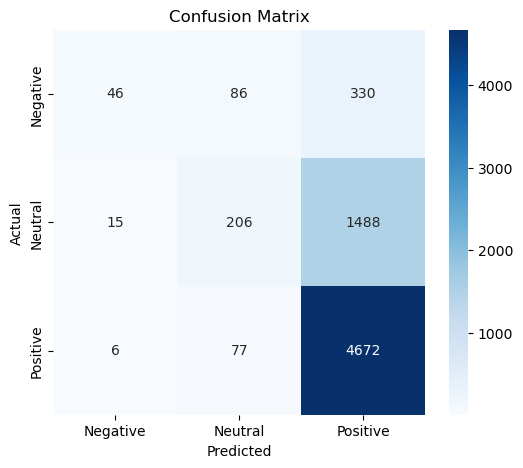

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()